Welcome to Data Science Individual Assignment

In [33]:
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
import numpy as np
from sklearn import preprocessing
from scipy.optimize import curve_fit
import numpy as np
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [34]:
df = pd.read_csv('C:/Users/User/Desktop/MMU/Academics/Y2S2/Data Science/Assignment/Datasets/Influenza_NY_modify.csv')
df = df.drop(df.columns[0], axis='columns')  # first column is useless
df['Prob_infected'] = df['Infected'] / df['Population']  # Probability of being infected (Weekly)
df['Density'] = df['Population'] / df['Area']  # Density of population of the area
df['Week Ending Date'] = pd.to_datetime(df['Week Ending Date'], format='%m/%d/%Y')
df['Season'] = df['Season'].str.split('-').str[0].astype(int)  # Extract the starting year of the season



In [35]:
# Define a dictionary to map month numbers to month names
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Dropdown widget for plot selection
plot_dropdown = widgets.Dropdown(
    options=['Population vs Infected Cases', 'Month vs Infected Cases'],
    value='Population vs Infected Cases',
    description='Plot:'
)

# Dropdown widget for county selection
county_dropdown = widgets.Dropdown(
    options=['Overall'] + list(df['County'].unique()),
    description='County:',
    value='Overall',
    disabled=False,
)

def update_plot(plot, selected_county):
    plt.clf()  # Clear the current plot

    # Create a new figure for the plot
    plt.figure(figsize=(16, 6))
    
    if plot == 'Population vs Infected Cases':
        if selected_county == 'Overall':
            # Overall relationship between population and infected cases
            plt.scatter(df['Population'], df['Infected'], s=50, alpha=0.5)

            # Set the plot title and axis labels
            plt.title('Relationship between Population and Infected Cases (Overall)', fontsize=15)
            plt.xlabel('Population')
            plt.ylabel('Infected Cases')

        else:
            # Filter data for the selected county
            df_county = df[df['County'] == selected_county]

            # Relationship between population and infected cases for the selected county
            plt.scatter(df_county['Population'], df_county['Infected'], s=50, alpha=0.5)

            # Set the plot title and axis labels
            plt.title(f'Relationship between Population and Infected Cases ({selected_county} County)', fontsize=15)
            plt.xlabel('Population')
            plt.ylabel('Infected Cases')

    elif plot == 'Month vs Infected Cases':
        # Overall relationship between month and infected cases
        plt.scatter(df['Month'], df['Infected'], s=50, alpha=0.5)

        # Set the plot title and axis labels
        plt.title('Relationship between Month and Infected Cases (Overall)', fontsize=15)
        plt.xlabel('Month')
        plt.ylabel('Infected Cases')

    plt.show()

# Call the update_plot function when the plot dropdown or county dropdown value changes
widgets.interact(update_plot, plot=plot_dropdown, selected_county=county_dropdown)


interactive(children=(Dropdown(description='Plot:', options=('Population vs Infected Cases', 'Month vs Infecte…

<function __main__.update_plot(plot, selected_county)>

In [36]:
# Create dropdown widgets for plot and county selection
plot_dropdown = widgets.Dropdown(
    options=['Relationship between Months and Infected Cases for Each Year', 'Overall Infected Cases'],
    value='Relationship between Months and Infected Cases for Each Year',
    description='Plot:'
)

county_dropdown = widgets.Dropdown(
    options=['Overall'] + list(df['County'].unique()),
    description='County:',
    value='Overall',
    disabled=False,
)

# Create a function to update the plot based on the selected options
def update_plot(plot, county):
    if plot == 'Relationship between Months and Infected Cases for Each Year':
        if county == 'Overall':
            # Group the data by year, month, and calculate the sum of infected cases
            df_yearly = df.groupby(['Year', 'Month'])['Infected'].sum().reset_index()

            # Sort the data by year and month
            df_yearly = df_yearly.sort_values(['Year', 'Month'])

            # Create a figure and axis object
            fig, ax = plt.subplots(figsize=(12, 6))

            # Loop through each year and plot the relationship between months and infected cases
            for year in df_yearly['Year'].unique():
                data_year = df_yearly[df_yearly['Year'] == year]
                ax.plot(data_year['Month'], data_year['Infected'], marker='o', linestyle='-', label=str(year))

            # Set the x-axis ticks and labels
            ax.set_xticks(range(1, 13))
            ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

            # Set the y-axis label and title
            ax.set_ylabel('Infected Cases')
            ax.set_title('Relationship between Months and Infected Cases for Each Year')

            # Add a legend
            ax.legend()

            # Show the grid
            ax.grid(True)

            # Show the plot
            plt.show()
        else:
            # Filter the data for the selected county
            df_county = df[df['County'] == county]

            # Group the data by year, month, and calculate the sum of infected cases
            df_yearly = df_county.groupby(['Year', 'Month'])['Infected'].sum().reset_index()

            # Sort the data by year and month
            df_yearly = df_yearly.sort_values(['Year', 'Month'])

            # Create a figure and axis object
            fig, ax = plt.subplots(figsize=(12, 6))

            # Loop through each year and plot the relationship between months and infected cases for the selected county
            for year in df_yearly['Year'].unique():
                data_year = df_yearly[df_yearly['Year'] == year]
                ax.plot(data_year['Month'], data_year['Infected'], marker='o', linestyle='-', label=str(year))

            # Set the x-axis ticks and labels
            ax.set_xticks(range(1, 13))
            ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

            # Set the y-axis label and title
            ax.set_ylabel('Infected Cases')
            ax.set_title(f'Relationship between Months and Infected Cases for {county}')

            # Add a legend
            ax.legend()

            # Show the grid
            ax.grid(True)

            # Show the plot
            plt.show()

    elif plot == 'Overall Infected Cases':
        if county == 'Overall':
            # Group the data by month and calculate the sum of infected cases
            df_monthly = df.groupby('Month')['Infected'].sum().reset_index()

            # Sort the data by month
            df_monthly = df_monthly.sort_values('Month')

            # Plot the relationship between months and infected cases
            plt.figure(figsize=(12, 6))
            plt.plot(df_monthly['Month'], df_monthly['Infected'], marker='o', linestyle='-', color='b')
            plt.xlabel('Month')
            plt.ylabel('Infected Cases')
            plt.title('Overall Infected Cases by Month')
            plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
            plt.grid(True)
            plt.show()
        else:
            # Filter the data for the selected county
            df_county = df[df['County'] == county]

            # Group the data by month and calculate the sum of infected cases
            df_monthly = df_county.groupby('Month')['Infected'].sum().reset_index()

            # Sort the data by month
            df_monthly = df_monthly.sort_values('Month')

            # Plot the infected cases for the selected county
            plt.figure(figsize=(12, 6))
            plt.plot(df_monthly['Month'], df_monthly['Infected'], marker='o', linestyle='-', color='b')
            plt.xlabel('Month')
            plt.ylabel('Infected Cases')
            plt.title(f'Infected Cases for {county} by Month')
            plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
            plt.grid(True)
            plt.show()

# Register the update_plot function as the callback for the plot and county dropdowns
widgets.interact(update_plot, plot=plot_dropdown, county=county_dropdown)

interactive(children=(Dropdown(description='Plot:', options=('Relationship between Months and Infected Cases f…

<function __main__.update_plot(plot, county)>

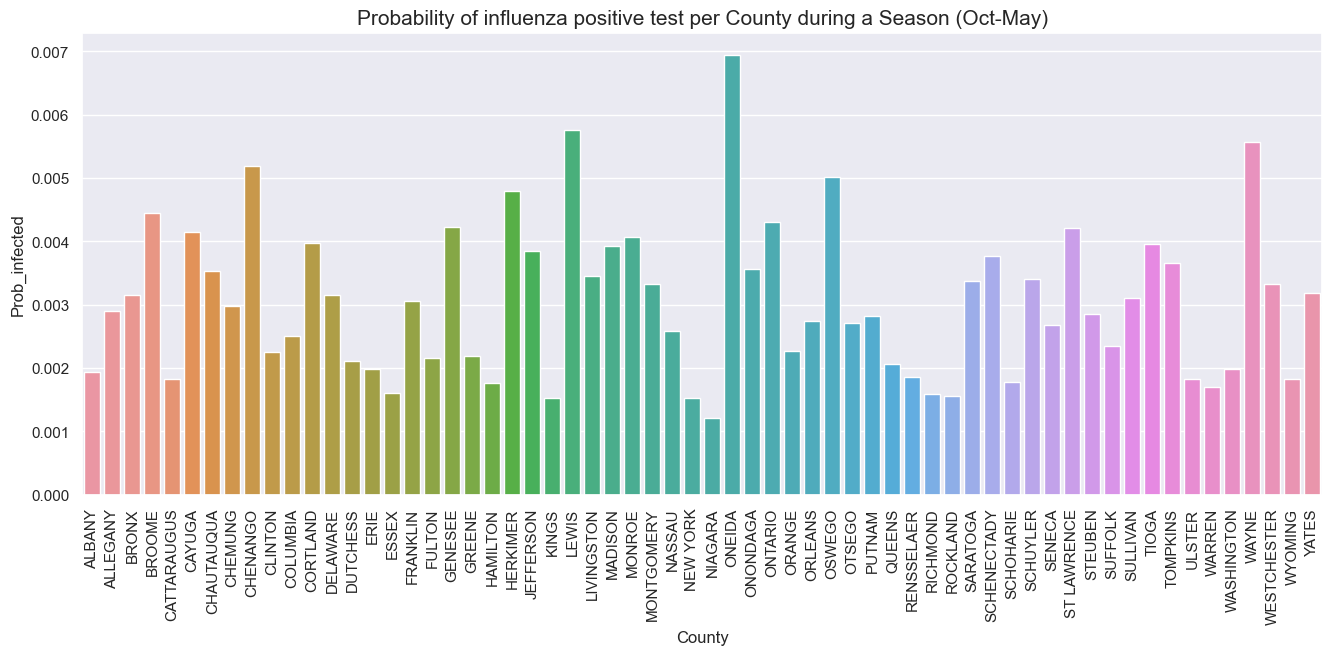

In [49]:
df_p=df.groupby(['County','Season'])['Prob_infected'].sum().reset_index()
df_p=df_p.groupby(['County']).mean()['Prob_infected'].reset_index()
plt.figure(figsize=(16, 6))
plt.title('Probability of influenza positive test per County during a Season (Oct-May)',fontsize=15)
sns.set()
ax=sns.barplot(x='County',y='Prob_infected',data=df_p)
for item in ax.get_xticklabels():
    item.set_rotation(90)
    

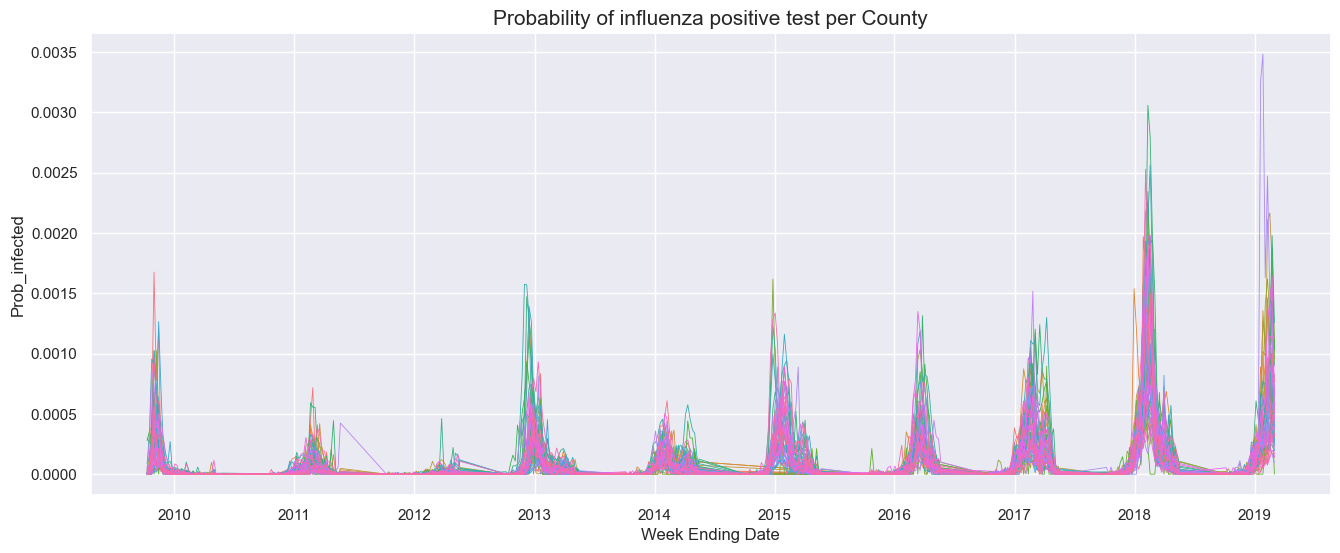

interactive(children=(Dropdown(description='County:', options=('ALBANY', 'ALLEGANY', 'BRONX', 'BROOME', 'CATTA…

In [50]:
# Group the data by County and Week Ending Date, and calculate the sum of Prob_infected
df_p = df.groupby(['County', 'Week Ending Date'])['Prob_infected'].sum().reset_index()

# Create a line plot of the Probability of influenza positive test per County
plt.figure(figsize=(16, 6))
plt.title('Probability of influenza positive test per County', fontsize=15)
sns.set()
ax = sns.lineplot(x='Week Ending Date', y='Prob_infected', hue='County',
                  data=df_p[['Week Ending Date', 'Prob_infected', 'County']], lw=0.6, legend=False)

# Show the plot
plt.show()

# Register the update_plot function as the callback for the county dropdown
@interact(county=widgets.Dropdown(options=list(df['County'].unique()), description='County:'))
def interactive_plot(county):
    # Filter the data for the selected county
    df_county = df[df['County'] == county]
    
    # Group the data by County and Week Ending Date, and calculate the sum of Prob_infected
    df_p = df_county.groupby(['County', 'Week Ending Date'])['Prob_infected'].sum().reset_index()

    # Create a line plot of the Probability of influenza positive test per County
    plt.figure(figsize=(16, 6))
    plt.title(f'Probability of influenza positive test for {county} County', fontsize=15)
    sns.set()
    ax = sns.lineplot(x='Week Ending Date', y='Prob_infected', hue='County',
                      data=df_p[['Week Ending Date', 'Prob_infected', 'County']], lw=0.6, legend=False)

    # Show the plot
    plt.show()

In [39]:
# Create dropdown widget for plot selection
plot_dropdown = widgets.Dropdown(
    options=['Monthly Probability of Influenza Positive test per County', 'Monthly Probability of the Highest and the Lowest Influenza Positive test per County'],
    value='Monthly Probability of Influenza Positive test per County',
    description='Plot:'
)

# Create a function to update the plot based on the selected option
def update_plot(plot):
    if plot == 'Monthly Probability of Influenza Positive test per County':
        df_p=df.groupby(['County','Month'])['Prob_infected'].sum().reset_index()
        plt.figure(figsize=(16, 6))
        plt.title('Monthly probability of influenza positive test per County',fontsize=15)
        sns.set()
        df_p=df.groupby(['County','Year','Month'])['Prob_infected'].sum().reset_index()
        df_p=df_p.groupby(['County','Month']).mean()['Prob_infected'].reset_index() # Mean per month 

        ax = sns.lineplot(x='Month', y="Prob_infected", hue="County",data=df_p[['Month','Prob_infected','County']],marker='o',lw=0.8,legend=False)

    elif plot == 'Monthly Probability of the Highest and the Lowest Influenza Positive test per County':
        df_p=df.groupby(['County','Year','Month'])['Prob_infected'].sum().reset_index()
        df_p=df_p.groupby(['County','Month']).mean()['Prob_infected'].reset_index() # Mean per month 
        Most_infected=df_p.groupby(['County']).sum()['Prob_infected'].reset_index().sort_values('Prob_infected').iloc[-15::]['County']
        Least_infected=df_p.groupby(['County']).sum()['Prob_infected'].reset_index().sort_values('Prob_infected').iloc[0:15]['County']
        plt.figure(figsize=(16, 6))
        plt.title('Monthly probability of influenza positive test per County',fontsize=15)
        sns.set()
        selected_counties=np.concatenate([Most_infected[-4::],Least_infected[0:4]])

        df_p=df_p[df_p['County'].isin(selected_counties)]

        ax = sns.lineplot(x='Month', y="Prob_infected", hue="County",data=df_p[['Month','Prob_infected','County']],marker='o',lw=1,legend='full')

    plt.xlabel('Month')
    plt.ylabel('Probability of Influenza Positive Test')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the update_plot function when the plot dropdown value changes
widgets.interact(update_plot, plot=plot_dropdown)

interactive(children=(Dropdown(description='Plot:', options=('Monthly Probability of Influenza Positive test p…

<function __main__.update_plot(plot)>

In [40]:
# Create a dropdown widget for plot selection
plot_dropdown = widgets.Dropdown(
    options=['2020 Proportion of hospital beds per County', '2020 proportion of hospital service per County','Average repiratory medical interventions per person', 'Average total expenditure of respiratory medical interventions per person'],
    value='2020 Proportion of hospital beds per County',
    description='Plot:'
)

# Create a function to update the plot based on the selected option
def update_plot(plot):
    if plot == '2020 Proportion of hospital beds per County':
        df_p=df[['County','Year','Population','Beds_hospital','Service_hospital']]
        df_p=df_p[df_p['Year']==2017]
        df_p['Prop_hosp_beds']=df_p['Beds_hospital']/df_p['Population']
        df_p['Prop_hosp_service']=df_p['Service_hospital']/df_p['Population']
        df_p=df_p.drop_duplicates()
        plt.figure(figsize=(16, 6))
        plt.title('2020 proportion of hospital beds per County',fontsize=15)

        sns.set()
        ax=sns.barplot(x='County',y='Prop_hosp_beds',data=df_p)

        for item in ax.get_xticklabels():
            item.set_rotation(90)
        sns.set()

    elif plot == '2020 proportion of hospital service per County':
        df_p=df[['County','Year','Population','Beds_hospital','Service_hospital']]
        df_p=df_p[df_p['Year']==2017]
        df_p['Prop_hosp_beds']=df_p['Beds_hospital']/df_p['Population']
        df_p['Prop_hosp_service']=df_p['Service_hospital']/df_p['Population']
        df_p=df_p.drop_duplicates()
        plt.figure(figsize=(16, 6))
        plt.title('2020 proportion of hospital service per County',fontsize=15)
        sns.set()
        ax=sns.barplot(x='County',y='Prop_hosp_service',data=df_p)
        for item in ax.get_xticklabels():
            item.set_rotation(90)
        sns.set()

    elif plot == 'Average repiratory medical interventions per person':
        df_p=df[['County','Year','Population','Discharges_Other_Hospital_intervention',
            'Discharges_Respiratory_system_interventions',
            'Total_Charge_Other_Hospital_intervention',
            'Total_Charge_Respiratory_system_interventions']]
        df_p=df_p.groupby(['County','Year','Population']).sum().reset_index()
        df_p=df_p[df_p['Year'].isin([2009,2010,2011,2012,2013,2014,2015,2016,2017])]
        df_p=df_p.groupby(['County','Population']).mean().reset_index()

        df_p['Discharges_respiratory_pp']=df_p['Discharges_Respiratory_system_interventions']/df_p['Population']
        df_p.head()
        plt.figure(figsize=(16, 6))
        plt.title('Average respiratory medical interventions per person',fontsize=15)
        sns.set()
        ax=sns.barplot(x='County',y='Discharges_respiratory_pp',ci=None,data=df_p)
        for item in ax.get_xticklabels():
            item.set_rotation(90)
            
    elif plot == 'Average total expenditure of respiratory medical interventions per person':
        df_p=df[['County','Year','Population','Discharges_Other_Hospital_intervention',
            'Discharges_Respiratory_system_interventions',
            'Total_Charge_Other_Hospital_intervention',
            'Total_Charge_Respiratory_system_interventions']]
        df_p=df_p.groupby(['County','Year','Population']).sum().reset_index()
        df_p=df_p[df_p['Year'].isin([2009,2010,2011,2012,2013,2014,2015,2016,2017])]
        df_p=df_p.groupby(['County','Population']).mean().reset_index()
        del df_p['Year']

        df_p['Totcharge_respiratory_pp']=df_p['Total_Charge_Respiratory_system_interventions']/df_p['Population']
        df_p.head()
        plt.figure(figsize=(16, 6))
        plt.title('Average total expenditure of respiratory medical interventions per person',fontsize=15)
        sns.set()
        ax=sns.barplot(x='County',y='Totcharge_respiratory_pp',ci=None,data=df_p)
        for item in ax.get_xticklabels():
            item.set_rotation(90)
        sns.set()
        
# Call the update_plot function when the plot dropdown value changes
widgets.interact(update_plot, plot=plot_dropdown)
#df_p=df_p[df_p['County'].isin(Most_infected)]
#df_p.head(10)

interactive(children=(Dropdown(description='Plot:', options=('2020 Proportion of hospital beds per County', '2…

<function __main__.update_plot(plot)>

In [41]:
# Group the data by county and calculate the sum of age group columns
df_county_age = df.groupby('County')[['Under_18', '18-24', '25-44', '45-64', 'Above_65']].sum()

# Set the width of each bar
bar_width = 0.1

# Get the number of age groups
num_age_groups = len(df_county_age.columns)

# Set the x-axis positions for each bar
positions = np.arange(num_age_groups)

# Create the dropdown widget for county selection
county_dropdown = widgets.Dropdown(
    options=['Overall'] + df_county_age.index.tolist(),
    description='County:',
    value='Overall',
    disabled=False
)

# Define the update function
def update_plot(selected_county):
    plt.clf()  # Clear the current plot

    # Create a new figure for the plot
    plt.figure(figsize=(16, 6))

    if selected_county == 'Overall':
        # Calculate the overall sum of age group columns
        age_group_data = df_county_age.sum()
        title = 'Overall Distribution of Age Groups'
    else:
        # Retrieve the age group data for the selected county
        age_group_data = df_county_age.loc[selected_county]
        title = f'Distribution of Age Groups in {selected_county} County'

    # Create the bar chart for the selected county or overall
    plt.bar(positions, age_group_data, width=bar_width)

    # Set the x-axis ticks and labels
    plt.xticks(positions, age_group_data.index)

    # Set the plot title and axis labels
    plt.title(title, fontsize=15)
    plt.xlabel('Age Group')
    plt.ylabel('Count')

    plt.show()

# Register the update function as the callback for the dropdown widget
widgets.interact(update_plot, selected_county=county_dropdown)

interactive(children=(Dropdown(description='County:', options=('Overall', 'ALBANY', 'ALLEGANY', 'BRONX', 'BROO…

<function __main__.update_plot(selected_county)>

In [42]:
# Convert the 'Year' and 'Month' columns to datetime format
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample the data to the desired time period (e.g., 'M' for monthly, 'W' for weekly)
resampled_df = df['Infected'].resample('M').sum()

# Create a dropdown widget for county selection
county_dropdown = widgets.Dropdown(
    options=['Overall'] + df['County'].unique().tolist(),
    value='Overall',
    description='County:'
)

# Create a function to update the plot based on the selected county
def update_plot(county):
    plt.figure(figsize=(16, 6))

    if county == 'Overall':
        # Plot the overall trend
        plt.plot(resampled_df.index, resampled_df.values, lw=2, label='Overall Trend')

        # Perform linear regression for the overall trend
        x = pd.to_numeric(resampled_df.index).values.reshape(-1, 1)
        y = resampled_df.values.reshape(-1, 1)
        reg = LinearRegression()
        reg.fit(x, y)

        # Move the linear regression line up by the first value of the overall trend
        first_value = resampled_df.values[0]
        adjusted_reg_line = reg.predict(x) + first_value

        # Extend the x-axis range to the year 2026
        x_extended = pd.date_range(start=resampled_df.index[0], end='2026-01-01', freq='M')
        x_extended_numeric = pd.to_numeric(x_extended).values.reshape(-1, 1)

        # Predict the values for the extended period using the existing linear regression model
        y_extended = reg.predict(x_extended_numeric)

        # Adjust the extended linear regression line by adding the first value of the overall trend
        adjusted_extended_reg_line = y_extended.flatten() + first_value

        # Plot the linear regression line for the overall trend
        plt.plot(resampled_df.index, adjusted_reg_line, 'r--', lw=2, label='Overall Linear Regression Line')

        # Calculate the confidence interval for the linear regression line
        confidence = 1.96 * np.std(y) / np.sqrt(len(y))
        lower_bound_reg = adjusted_reg_line - confidence
        upper_bound_reg = adjusted_reg_line + confidence

        # Extend the confidence interval to the extended period
        lower_bound_extended = lower_bound_reg.flatten()[0] + np.zeros(len(x_extended))
        upper_bound_extended = upper_bound_reg.flatten()[0] + np.zeros(len(x_extended))

        # Plot the extended linear regression line for the overall trend
        plt.plot(x_extended, adjusted_extended_reg_line, 'r--', lw=2, label='Extended Overall Linear Regression Line')

        # Plot the shaded region for the confidence interval of the linear regression line
        plt.fill_between(resampled_df.index, lower_bound_reg.flatten(), upper_bound_reg.flatten(), color='red', alpha=0.1, label='Confidence Interval')
    else:
        # Filter the data for the selected county
        county_data = df[df['County'] == county]['Infected'].resample('M').sum()
        # Plot the county-specific trend
        plt.plot(county_data.index, county_data.values, lw=2, label='County Trend')

        # Perform linear regression for the county-specific trend
        x = pd.to_numeric(county_data.index).values.reshape(-1, 1)
        y = county_data.values.reshape(-1, 1)
        reg = LinearRegression()
        reg.fit(x, y)

        # Move the linear regression line up by the first value of the county-specific trend
        first_value = county_data.values[0]
        adjusted_reg_line = reg.predict(x) + first_value

        # Extend the x-axis range to the year 2026
        x_extended = pd.date_range(start=county_data.index[0], end='2026-01-01', freq='M')
        x_extended_numeric = pd.to_numeric(x_extended).values.reshape(-1, 1)

        # Predict the values for the extended period using the existing linear regression model
        y_extended = reg.predict(x_extended_numeric)

        # Adjust the extended linear regression line by adding the first value of the county-specific trend
        adjusted_extended_reg_line = y_extended.flatten() + first_value

        # Plot the linear regression line for the county-specific trend
        plt.plot(county_data.index, adjusted_reg_line, 'g--', lw=2, label='County Linear Regression Line')

        # Calculate the confidence interval for the linear regression line
        confidence = 1.96 * np.std(y) / np.sqrt(len(y))
        lower_bound_reg = adjusted_reg_line - confidence
        upper_bound_reg = adjusted_reg_line + confidence

        # Extend the confidence interval to the extended period
        lower_bound_extended = lower_bound_reg.flatten()[0] + np.zeros(len(x_extended))
        upper_bound_extended = upper_bound_reg.flatten()[0] + np.zeros(len(x_extended))

        # Plot the extended linear regression line for the county-specific trend
        plt.plot(x_extended, adjusted_extended_reg_line, 'g--', lw=2, label='Extended County Linear Regression Line')

        # Plot the shaded region for the confidence interval of the linear regression line
        plt.fill_between(county_data.index, lower_bound_reg.flatten(), upper_bound_reg.flatten(), color='green', alpha=0.1, label='Confidence Interval')

    # Set the plot title and axis labels
    plt.title('Trend of Infected Cases Over Time', fontsize=15)
    plt.xlabel('Date')
    plt.ylabel('Infected Cases')

    # Format the x-axis ticks with month and year
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

    # Display the legend
    plt.legend()

    plt.show()

# Call the update_plot function when the county dropdown value changes
widgets.interact(update_plot, county=county_dropdown)

interactive(children=(Dropdown(description='County:', options=('Overall', 'ALBANY', 'ALLEGANY', 'BRONX', 'BROO…

<function __main__.update_plot(county)>

In [43]:
# Create a dropdown widget for county selection
county_dropdown = widgets.Dropdown(
    options=['Overall per County', 'Overall'] + df['County'].unique().tolist(),
    value='Overall per County',
    description='County:'
)

# Create a function to update the plot based on the selected county
def update_plot(county):
    plt.figure(figsize=(16, 6))
    plt.title('Overall Number of Infected over the Years', fontsize=15)
    sns.set()

    if county == 'Overall':
        # Calculate overall infected cases per year
        df_overall = df.groupby('Year')['Infected'].sum().reset_index()

        # Line plot for overall infected cases
        sns.lineplot(x='Year', y='Infected', data=df_overall, color='black', lw=1.5)
        
    elif county == 'Overall per County':
        df_county = df.groupby(['County', 'Year'])['Infected'].sum().reset_index()
        
        ax = sns.lineplot(x='Year', y='Infected', hue='County', data=df_county, lw=0.8, legend=False)

    else:
        # Filter the data for the selected county
        county_data = df[df['County'] == county].groupby('Year')['Infected'].sum().reset_index()

        # Line plot for county-specific infected cases
        sns.lineplot(x='Year', y='Infected', data=county_data, color='black', lw=1.5)

    plt.xlabel('Year')
    plt.ylabel('Infected')
    plt.grid(True)
    plt.show()

# Call the update_plot function when the county dropdown value changes
widgets.interact(update_plot, county=county_dropdown)

interactive(children=(Dropdown(description='County:', options=('Overall per County', 'Overall', 'ALBANY', 'ALL…

<function __main__.update_plot(county)>

In [44]:
# Create a dropdown widget for county selection
county_dropdown = widgets.Dropdown(
    options=['Overall'] + df['County'].unique().tolist(),
    value='Overall',
    description='County:'
)

# Create a function to update the plot based on the selected county
def update_plot(county):
    plt.figure(figsize=(16, 6))
    plt.title('Overall Number of Infected over the Years', fontsize=15)
    sns.set()

    if county == 'Overall':
        # Calculate overall infected cases per year
        df_overall = df.groupby('Year')['Infected'].sum().reset_index()

        # Line plot for overall infected cases
        sns.lineplot(x='Year', y='Infected', data=df_overall, color='black', lw=1.5)

        # Fit linear regression to the data
        X = df_overall['Year'].values.reshape(-1, 1)
        y = df_overall['Infected'].values.reshape(-1, 1)
        linear_reg = LinearRegression()
        linear_reg.fit(X, y)
        intercept_lin = linear_reg.intercept_
        slope_lin = linear_reg.coef_

        # Extend linear regression line into 2025
        extended_years_lin = np.arange(min(df_overall['Year']), 2026)
        extended_infected_lin = linear_reg.predict(extended_years_lin.reshape(-1, 1))

        # Plot the linear regression line
        plt.plot(extended_years_lin, extended_infected_lin, 'b-', label='Linear Regression')

    else:
        # Filter the data for the selected county
        county_data = df[df['County'] == county].groupby('Year')['Infected'].sum().reset_index()

        # Line plot for county-specific infected cases
        sns.lineplot(x='Year', y='Infected', data=county_data, color='black', lw=1.5)

        # Fit linear regression to the data
        X = county_data['Year'].values.reshape(-1, 1)
        y = county_data['Infected'].values.reshape(-1, 1)
        linear_reg = LinearRegression()
        linear_reg.fit(X, y)
        intercept_lin = linear_reg.intercept_
        slope_lin = linear_reg.coef_

        # Extend linear regression line into 2025
        extended_years_lin = np.arange(min(county_data['Year']), 2026)
        extended_infected_lin = linear_reg.predict(extended_years_lin.reshape(-1, 1))

        # Plot the linear regression line
        plt.plot(extended_years_lin, extended_infected_lin, 'b-', label='Linear Regression')

    plt.xlabel('Year')
    plt.ylabel('Infected')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the update_plot function when the county dropdown value changes
widgets.interact(update_plot, county=county_dropdown)

interactive(children=(Dropdown(description='County:', options=('Overall', 'ALBANY', 'ALLEGANY', 'BRONX', 'BROO…

<function __main__.update_plot(county)>

In [45]:
# Define a list of months to include in the dropdown
included_months = [month_names[i] for i in range(1, 13) if i not in [6, 7, 8, 9]]

# Dropdown widget for month selection
month_dropdown = widgets.Dropdown(
    options=included_months,
    description='Month:',
    value='January',
    disabled=False,
)

# Create a function to update the plot based on the selected month
def update_plot(month):
    plt.figure(figsize=(16, 6))
    plt.title(f'Number of Infected Cases in {month} over the Years', fontsize=15)
    sns.set()

    # Filter the data for the selected month
    selected_month = list(month_names.keys())[list(month_names.values()).index(month)]
    month_data = df[df['Month'] == selected_month]

    # Calculate infected cases per year
    year_data = month_data.groupby('Year')['Infected'].sum().reset_index()

    # Line plot for infected cases for the selected month
    sns.lineplot(x='Year', y='Infected', data=year_data, color='black', lw=1.5)

    # Fit linear regression to the data
    X = year_data['Year'].values.reshape(-1, 1)
    y = year_data['Infected'].values.reshape(-1, 1)
    linear_reg = LinearRegression()
    linear_reg.fit(X, y)
    intercept_lin = linear_reg.intercept_
    slope_lin = linear_reg.coef_

    # Extend linear regression line into 2025
    extended_years_lin = np.arange(min(year_data['Year']), 2026)
    extended_infected_lin = linear_reg.predict(extended_years_lin.reshape(-1, 1))

    # Plot the linear regression line
    plt.plot(extended_years_lin, extended_infected_lin, 'b-', label='Linear Regression')

    plt.xlabel('Year')
    plt.ylabel('Infected')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the update_plot function when the month dropdown value changes
widgets.interact(update_plot, month=month_dropdown)


interactive(children=(Dropdown(description='Month:', options=('January', 'February', 'March', 'April', 'May', …

<function __main__.update_plot(month)>

In [46]:
df_p=df.groupby(['County','Year','Month'])['Prob_infected'].sum().reset_index()
df_p=df_p.rename(columns={'Prob_infected':'Prob_month_infected'})
#df_p=df_p.groupby(['County','Year''Month']).mean()['Prob_infected'].reset_index() # Mean per month 

df=df.set_index(['County','Year','Month']).join(df_p.set_index(['County','Year','Month']))
df=df.reset_index()

df_p=df.groupby(['County','Season'])['Prob_infected'].sum().reset_index()
df_p=df_p.rename(columns={'Prob_infected':'Prob_season_infected'})


df=df.set_index(['County','Season']).join(df_p.set_index(['County','Season']))
df=df.reset_index()

In [47]:
df_p=df.groupby(['County','Year','Population','Month','Season','Region']).mean().reset_index()
df_month=df_p[['County', 'Year', 'Month','Avg household size','Area',
       'Population', 'Under_18', '18-24', '25-44', '45-64', 'Above_65',
       'Median_age', 'Medianfamilyincome', 'Number_households',
       'Beds_adult_facility_care', 'Beds_hospital', 'County_Served_hospital',
       'Service_hospital', 'Discharges_Other_Hospital_intervention',
       'Discharges_Respiratory_system_interventions',
       'Total_Charge_Other_Hospital_intervention',
       'Total_Charge_Respiratory_system_interventions', 'Unemp_rate', 'Density', 'Prob_month_infected','Prob_season_infected']]
df_p=df.groupby(['County','Season','Region']).mean().reset_index()
df_season=df_p[['County','Season','Avg household size','Area',
       'Population', 'Under_18', '18-24', '25-44', '45-64', 'Above_65',
       'Median_age', 'Medianfamilyincome', 'Number_households',
       'Beds_adult_facility_care', 'Beds_hospital', 'County_Served_hospital',
       'Service_hospital', 'Discharges_Other_Hospital_intervention',
       'Discharges_Respiratory_system_interventions',
       'Total_Charge_Other_Hospital_intervention',
       'Total_Charge_Respiratory_system_interventions', 'Unemp_rate', 'Density','Prob_season_infected']]

In [48]:
df_season=df_season.dropna()
all_columns = "+".join(df_season.columns)
all_columns=all_columns.replace('County+','')
all_columns=all_columns.replace('+Prob_season_infected','')
my_formula = "Prob_season_infected ~" + all_columns
import statsmodels.api as sm
import statsmodels.formula.api as smf
md=smf.mixedlm("Prob_season_infected ~Area+Population+Under_18+Above_65+Median_age+Medianfamilyincome+Number_households+Beds_adult_facility_care+Beds_hospital+County_Served_hospital+Service_hospital+Discharges_Other_Hospital_intervention+Discharges_Respiratory_system_interventions+Total_Charge_Other_Hospital_intervention+Total_Charge_Respiratory_system_interventions+Unemp_rate+Density", df_season,groups=df_season["County"])
mdf = md.fit()
print(mdf.summary())

                          Mixed Linear Model Regression Results
Model:                     MixedLM        Dependent Variable:        Prob_season_infected
No. Observations:          479            Method:                    REML                
No. Groups:                55             Scale:                     0.0000              
Min. group size:           8              Log-Likelihood:            1975.2227           
Max. group size:           9              Converged:                 Yes                 
Mean group size:           8.7                                                           
-----------------------------------------------------------------------------------------
                                              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------
Intercept                                      0.009    0.004   2.357 0.018  0.001  0.016
Area                                